In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from scipy import stats
from scipy.stats import skew


%matplotlib inline

1: Most Disadvantaged
7: Least Disadvantaged

https://data.sa.gov.au/data/dataset/index-of-disadvantage-by-school


https://data.gov.au/data/dataset/taxation-statistics-postcode-data
#Not used

Heatmap of school location vs. disadvantage - CBD as [0,0] - distance from there. Correlation of distance to E.D. Grouped by class : 1-7

In [7]:
df = pd.read_csv('index-of-disadvantage-by-school-2020.csv')

In [89]:
df.head(3)

,ID,School_Number,School_Name,Suburb,Post_Code,Type_of_Schooling,Index_of_Educational_Disadvantage,Latitude,Longitude
0,1,536,Aberfoyle Hub R-7 School,Aberfoyle Park,5159,Primary Education,6,-35.078139,138.595142
1,2,1673,Aberfoyle Park High School,Aberfoyle Park,5159,Secondary Education,6,-35.074007,138.594181
2,3,1919,Adelaide Botanic High School,Adelaide,5000,Secondary Education,7,-34.917055,138.606743


In [9]:
df.info

<bound method DataFrame.info of       ID  School_Number                     School_Name          Suburb  \
0      1            536        Aberfoyle Hub R-7 School  Aberfoyle Park   
1      2           1673      Aberfoyle Park High School  Aberfoyle Park   
2      3           1919    Adelaide Botanic High School        Adelaide   
3      4            997  Adelaide East Education Centre        Paradise   
4      5            768            Adelaide High School        Adelaide   
..   ...            ...                             ...             ...   
507  508            501             Yahl Primary School            Yahl   
508  509            999            Yalata Anangu School          Yalata   
509  510            766          Yankalilla Area School      Yankalilla   
510  511            767           Yorketown Area School       Yorketown   
511  512            195          Youth Education Centre           Cavan   

     Post_Code           Type_of_Schooling  Index_of_Educational_Di

In [10]:
df.isnull().sum()

ID                                   0
School_Number                        0
School_Name                          0
Suburb                               0
Post_Code                            0
Type_of_Schooling                    0
Index_of_Educational_Disadvantage    0
Latitude                             0
Longitude                            0
dtype: int64

In [11]:
df_20 = df.copy(deep=True)

In [12]:
df.head()

,ID,School_Number,School_Name,Suburb,Post_Code,Type_of_Schooling,Index_of_Educational_Disadvantage,Latitude,Longitude
0,1,536,Aberfoyle Hub R-7 School,Aberfoyle Park,5159,Primary Education,6,-35.078139,138.595142
1,2,1673,Aberfoyle Park High School,Aberfoyle Park,5159,Secondary Education,6,-35.074007,138.594181
2,3,1919,Adelaide Botanic High School,Adelaide,5000,Secondary Education,7,-34.917055,138.606743
3,4,997,Adelaide East Education Centre,Paradise,5075,Special Education,6,-34.873042,138.672971
4,5,768,Adelaide High School,Adelaide,5000,Secondary Education,5,-34.925733,138.586678


In [13]:
df_20.head()

,ID,School_Number,School_Name,Suburb,Post_Code,Type_of_Schooling,Index_of_Educational_Disadvantage,Latitude,Longitude
0,1,536,Aberfoyle Hub R-7 School,Aberfoyle Park,5159,Primary Education,6,-35.078139,138.595142
1,2,1673,Aberfoyle Park High School,Aberfoyle Park,5159,Secondary Education,6,-35.074007,138.594181
2,3,1919,Adelaide Botanic High School,Adelaide,5000,Secondary Education,7,-34.917055,138.606743
3,4,997,Adelaide East Education Centre,Paradise,5075,Special Education,6,-34.873042,138.672971
4,5,768,Adelaide High School,Adelaide,5000,Secondary Education,5,-34.925733,138.586678


# Making column names uniform to be able to call them in further code
for c in column_names:
        c = c.lower().replace(' ', '_')
        clean_column_names.append(c)
        
    return clean_column_name

In [16]:
#df_20.columns = clean_column_name(df_20.columns)

In [17]:
df20 = df_20.rename(columns=str.lower)

In [18]:
df20

,id,school_number,school_name,suburb,post_code,type_of_schooling,index_of_educational_disadvantage,latitude,longitude
0,1,536,Aberfoyle Hub R-7 School,Aberfoyle Park,5159,Primary Education,6,-35.078139,138.595142
1,2,1673,Aberfoyle Park High School,Aberfoyle Park,5159,Secondary Education,6,-35.074007,138.594181
2,3,1919,Adelaide Botanic High School,Adelaide,5000,Secondary Education,7,-34.917055,138.606743
3,4,997,Adelaide East Education Centre,Paradise,5075,Special Education,6,-34.873042,138.672971
4,5,768,Adelaide High School,Adelaide,5000,Secondary Education,5,-34.925733,138.586678
...,...,...,...,...,...,...,...,...,...
507,508,501,Yahl Primary School,Yahl,5291,Primary Education,4,-37.879293,140.832014
508,509,999,Yalata Anangu School,Yalata,5690,Aboriginal/Anangu Schools,1,-31.480012,131.843548
509,510,766,Yankalilla Area School,Yankalilla,5203,Primary/Secondary Combined,5,-35.453300,138.333092
510,511,767,Yorketown Area School,Yorketown,5576,Primary/Secondary Combined,4,-35.015376,137.615442


In [19]:
print(np.min(df20))
print(np.max(df20))

id                                                           1
school_number                                              104
school_name                           Aberfoyle Hub R-7 School
suburb                                          Aberfoyle Park
post_code                                                  872
type_of_schooling                    Aboriginal/Anangu Schools
index_of_educational_disadvantage                            1
latitude                                              -38.0025
longitude                                              129.172
dtype: object
id                                                      512
school_number                                          1919
school_name                          Youth Education Centre
suburb                                            Yorketown
post_code                                              5734
type_of_schooling                         Special Education
index_of_educational_disadvantage                         7

In [20]:
#Identifying that postcode 872 is likely not a South Australian postcode - will investigate further)
df20.columns

Index(['id', 'school_number', 'school_name', 'suburb', 'post_code',
       'type_of_schooling', 'index_of_educational_disadvantage', 'latitude',
       'longitude'],
      dtype='object')

In [21]:
#Locating postcodes < 5000
df20.loc[df20.post_code < 5000]

,id,school_number,school_name,suburb,post_code,type_of_schooling,index_of_educational_disadvantage,latitude,longitude
14,15,1001,Amata Anangu School,Amata,872,Aboriginal/Anangu Schools,1,-26.151709,131.147712
115,116,1034,Ernabella Anangu School,Ernabella,872,Aboriginal/Anangu Schools,1,-26.283843,132.135240
131,132,1196,Fregon Anangu School,Fregon,872,Aboriginal/Anangu Schools,1,-26.765131,132.028295
182,183,1174,Indulkana Anangu School,Indulkana,872,Aboriginal/Anangu Schools,1,-26.965604,133.310547
203,204,1696,Kenmore Park Anangu School,Kenmore Park,872,Aboriginal/Anangu Schools,1,-26.326899,132.446178
267,268,1527,Mimili Anangu School,Mimili,872,Aboriginal/Anangu Schools,1,-27.006196,132.708620
295,296,1859,Murputja Anangu School,Murputja Homelands,872,Aboriginal/Anangu Schools,1,-26.159352,130.183455
354,355,1526,Pipalyatjara Anangu School,Pipalyatjara,872,Aboriginal/Anangu Schools,1,-26.162549,129.172118
482,483,1717,Watarru Anangu School,Pipalyatjara,872,Aboriginal/Anangu Schools,1,-26.162549,129.172118


n = 9. I was going to consider these schools as outliers as they are located in SA but have a NT postcode - they may affect the visualisation of the data but they should be remembered as extreme data points that potentially confirm the hypothesis. (I initially ran it with these columns dropped.)

In [22]:
# get names of indexes for which post code is < 5000
index_names = df20.loc[df20.post_code < 5000].index

In [ ]:
# drop these row indexes from dataFrame (I tried to rename but it wouldn't allow me to - have to modify original df20 dataframe)
#df20 = df20.drop(index_names, inplace = False)

In [23]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 512 non-null    int64  
 1   school_number                      512 non-null    int64  
 2   school_name                        512 non-null    object 
 3   suburb                             512 non-null    object 
 4   post_code                          512 non-null    int64  
 5   type_of_schooling                  512 non-null    object 
 6   index_of_educational_disadvantage  512 non-null    int64  
 7   latitude                           512 non-null    float64
 8   longitude                          512 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 36.1+ KB


In [24]:
print(np.min(df20.post_code))

872


Lat/long for Adelaide CBD = -34.92866, 138.59863

In [25]:
#Was looking to make a folium map to show location of all schools
m = folium.Map([-34.92866, 138.59863], zoom_start = 7)

In [26]:
m

In [87]:
def plotDot(point):
    
    folium.Marker(location=[point.latitude, point.longitude]).add_to(m)

#use df.apply(,axis=1) to iterate through every row in your dataframe
df20.apply(plotDot, axis = 1)

0      None
1      None
2      None
3      None
4      None
       ... 
507    None
508    None
509    None
510    None
511    None
Length: 512, dtype: object

In [88]:
m

In [ ]:
#colourm = 

# Plot of schools and their educational disadvantage

In [128]:
m = df20['index_of_educational_disadvantage'].mean()
m

4.3046875

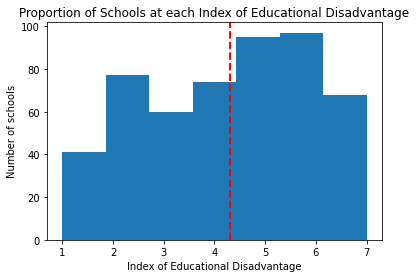

In [131]:
plt.hist(df20.index_of_educational_disadvantage, bins = 7)
plt.title("Proportion of Schools at each Index of Educational Disadvantage")
plt.xlabel("Index of Educational Disadvantage")
plt.ylabel("Number of schools")
plt.axvline(m, color = 'r', linestyle = 'dashed', linewidth = 2)
plt.show()

In [123]:
sk = skew(df20.index_of_educational_disadvantage)
print("Skewness of index of educational disadvantage: ", sk)

Skewness of index of educational disadvantage:  -0.21660424714549906


Approximately normally distributed (as <-0.5)

# Mapping distance from Adelaide CBD using geopy

In [30]:
from geopy import distance

In [32]:
df20.head()

,id,school_number,school_name,suburb,post_code,type_of_schooling,index_of_educational_disadvantage,latitude,longitude
0,1,536,Aberfoyle Hub R-7 School,Aberfoyle Park,5159,Primary Education,6,-35.078139,138.595142
1,2,1673,Aberfoyle Park High School,Aberfoyle Park,5159,Secondary Education,6,-35.074007,138.594181
2,3,1919,Adelaide Botanic High School,Adelaide,5000,Secondary Education,7,-34.917055,138.606743
3,4,997,Adelaide East Education Centre,Paradise,5075,Special Education,6,-34.873042,138.672971
4,5,768,Adelaide High School,Adelaide,5000,Secondary Education,5,-34.925733,138.586678


#attempt
def distance_CBD(x, y):
    for i in range(5):
        result = []
        x = df20['latitude'][i]
        y = df20['longitude'][i]
        result_dist = result.append(x, y)
        
        print(result_dist)

In [34]:
#distance_CBD

In [35]:
#print((str(df20.id) + (df20.school_name[0]) + ": ("+str(df20.latitude[0])+", "+str(df20.longitude[0])+")"))

In [36]:
#Trying to get the formatting right for an attempt at iterating over the dataframe
print("("+str(df20.latitude[0])+", "+str(df20.longitude[0])+")")

(-35.078139, 138.59514199999998)


In [37]:
ID_1 = ("("+str(df20.latitude[0])+", "+(str(df20.longitude[0])+")"))

In [38]:
print(ID_1)

(-35.078139, 138.59514199999998)


In [39]:
#Getting distance to Adelaide CBD from the first lat-long in the dataframe and
ID_1 = (-35.078139, 138.59514199999998)
Adelaide_CBD = (-34.92866, 138.59863)
print((distance.distance(ID_1 , Adelaide_CBD).km))

16.586351834980064


In [40]:
Adelaide_CBD = (-34.92866, 138.59863)

#Another attempt

for i in len(df20):
        
        print("("+(df20.latitude[i])+", "+(df20.longitude[i])+")")

In [42]:
ID_1

(-35.078139, 138.59514199999998)

#Attempt

df20['latlong'] = ((distance.distance((df20.iloc[:,7]), (df20.iloc[:,8])), (Adelaide_CBD).km))

In [45]:
#Managing to zip into a new column of lat-long tuple
df20['lat_long'] = list(zip(df20.latitude, df20.longitude))
df20.head()

,id,school_number,school_name,suburb,post_code,type_of_schooling,index_of_educational_disadvantage,latitude,longitude,lat_long
0,1,536,Aberfoyle Hub R-7 School,Aberfoyle Park,5159,Primary Education,6,-35.078139,138.595142,"(-35.078139, 138.59514199999998)"
1,2,1673,Aberfoyle Park High School,Aberfoyle Park,5159,Secondary Education,6,-35.074007,138.594181,"(-35.074007, 138.594181)"
2,3,1919,Adelaide Botanic High School,Adelaide,5000,Secondary Education,7,-34.917055,138.606743,"(-34.917055, 138.606743)"
3,4,997,Adelaide East Education Centre,Paradise,5075,Special Education,6,-34.873042,138.672971,"(-34.873042, 138.672971)"
4,5,768,Adelaide High School,Adelaide,5000,Secondary Education,5,-34.925733,138.586678,"(-34.925733, 138.586678)"


In [46]:
df20.lat_long.value_counts()

(-36.312934999999996, 140.767516)    2
(-26.162549, 129.17211799999998)     2
(-34.891954, 138.63523)              2
(-35.115818, 139.26955)              2
(-34.819718, 138.95963)              2
                                    ..
(-34.759701, 138.66871799999998)     1
(-34.895194000000004, 138.613241)    1
(-34.471455999999996, 138.680418)    1
(-34.942677, 138.570592)             1
(-34.929734, 138.499429)             1
Name: lat_long, Length: 504, dtype: int64

In [47]:
ID_2 = ((distance.distance(df20.lat_long[1], Adelaide_CBD).km))

In [52]:
d = []
for i in range(len(df20)):
    try:
        d.append((distance.distance(df20.lat_long[i], Adelaide_CBD).km))
    except KeyError:
        d.append('This line has a key error')
            
d

[16.586351834980064,
 16.129997061758804,
 1.4856221899975854,
 9.178139829299592,
 1.1392969881479524,
 30.449929390653143,
 5.544642623395255,
 17.06456944038131,
 199.76760983600803,
 10.740097212429317,
 17.028294727876233,
 39.7940872073472,
 4.9910637521582455,
 390.1043355266387,
 1206.553463715752,
 514.5992260494347,
 63.14152561537553,
 31.96449114621948,
 83.9757780488544,
 14.32050525056206,
 7.988820227593836,
 11.448120347055653,
 100.24322279168307,
 280.2071321809943,
 10.241611640363537,
 9.280190474220719,
 87.9731921263374,
 87.82510828492127,
 17.223503772168137,
 17.676850269175834,
 188.0654668892891,
 15.285342578109558,
 309.77175591619465,
 8.812746724125189,
 11.162386863642322,
 196.68216864982864,
 35.14856036152853,
 35.14856036152853,
 4.239219775914823,
 10.72660531371869,
 10.72660531371869,
 8.425148132762994,
 28.28214288780372,
 112.82697194000713,
 120.6681792817007,
 151.87199127720726,
 228.69856363969743,
 249.37916393902157,
 249.37916393902157,


In [53]:
#Adding distance column to dataframe
df20['CBD_dist'] = d

In [54]:
df20.head()

,id,school_number,school_name,suburb,post_code,type_of_schooling,index_of_educational_disadvantage,latitude,longitude,lat_long,CBD_dist
0,1,536,Aberfoyle Hub R-7 School,Aberfoyle Park,5159,Primary Education,6,-35.078139,138.595142,"(-35.078139, 138.59514199999998)",16.586352
1,2,1673,Aberfoyle Park High School,Aberfoyle Park,5159,Secondary Education,6,-35.074007,138.594181,"(-35.074007, 138.594181)",16.129997
2,3,1919,Adelaide Botanic High School,Adelaide,5000,Secondary Education,7,-34.917055,138.606743,"(-34.917055, 138.606743)",1.485622
3,4,997,Adelaide East Education Centre,Paradise,5075,Special Education,6,-34.873042,138.672971,"(-34.873042, 138.672971)",9.178140
4,5,768,Adelaide High School,Adelaide,5000,Secondary Education,5,-34.925733,138.586678,"(-34.925733, 138.586678)",1.139297


In [55]:
df20.dtypes

id                                     int64
school_number                          int64
school_name                           object
suburb                                object
post_code                              int64
type_of_schooling                     object
index_of_educational_disadvantage      int64
latitude                             float64
longitude                            float64
lat_long                              object
CBD_dist                             float64
dtype: object

In [56]:
df20['CBD_dist'] = pd.to_numeric(df20['CBD_dist'], errors = 'coerce')

In [57]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 512 non-null    int64  
 1   school_number                      512 non-null    int64  
 2   school_name                        512 non-null    object 
 3   suburb                             512 non-null    object 
 4   post_code                          512 non-null    int64  
 5   type_of_schooling                  512 non-null    object 
 6   index_of_educational_disadvantage  512 non-null    int64  
 7   latitude                           512 non-null    float64
 8   longitude                          512 non-null    float64
 9   lat_long                           512 non-null    object 
 10  CBD_dist                           512 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 44.1+ KB


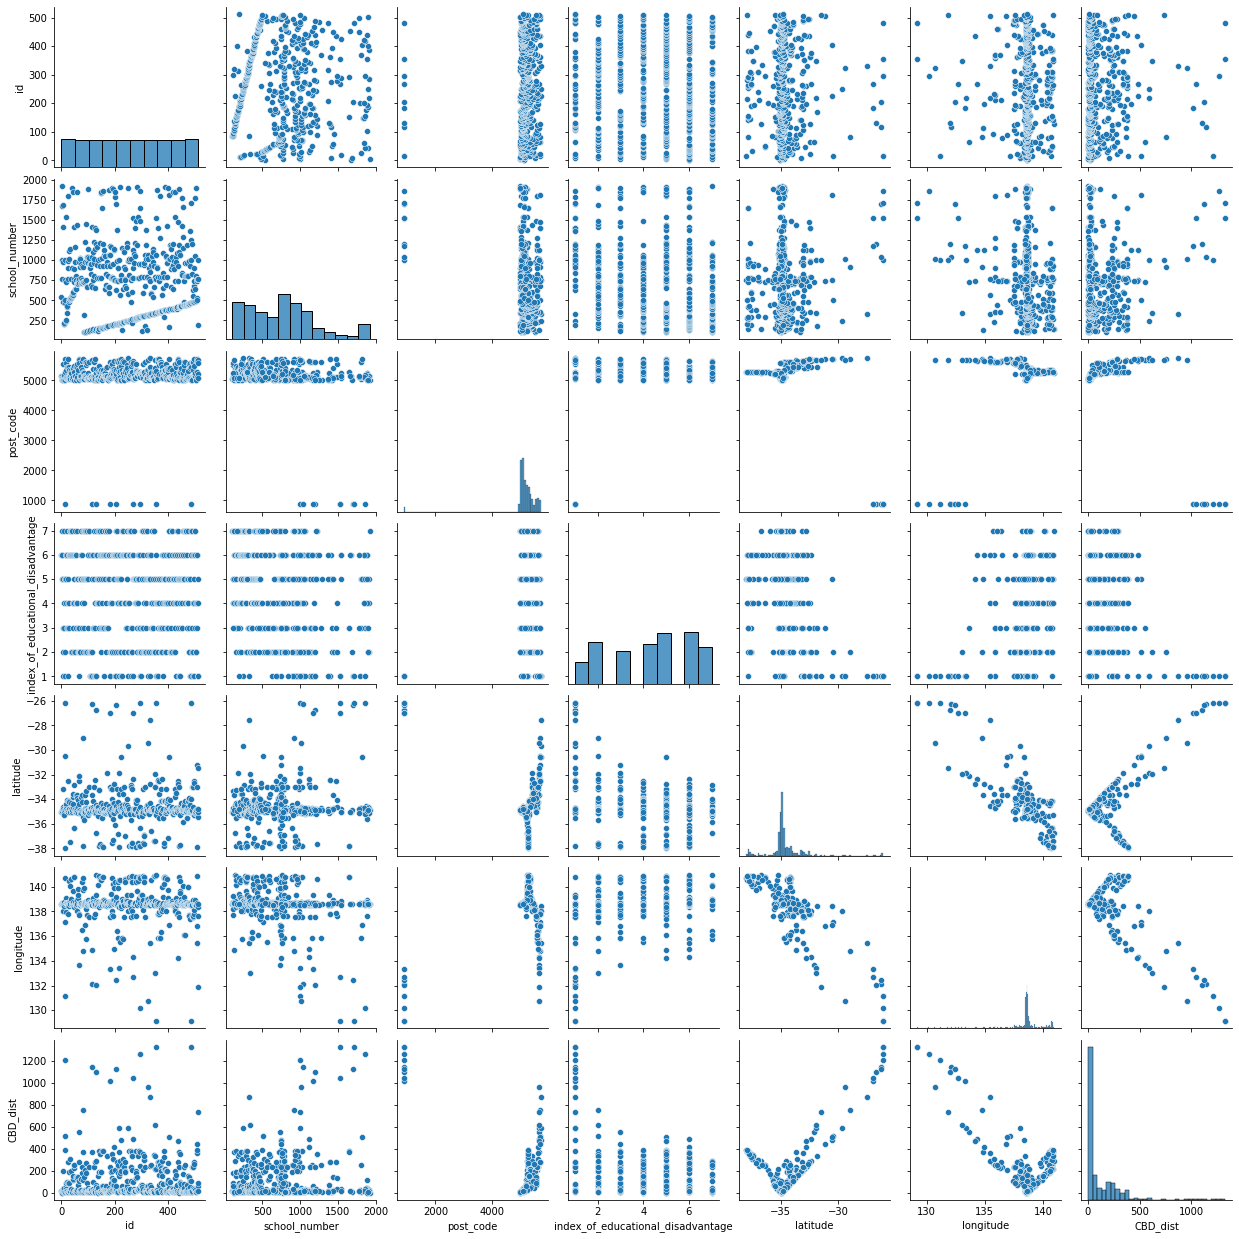

In [61]:
#sns.pairplot(data=df20, hue='index_of_educational_disadvantage')
sns.pairplot(data=df20)

In [59]:
np.mean(df20.CBD_dist)

123.67057015485437

In [60]:
np.median(df20.CBD_dist)

29.572995409521624

In [62]:
#Played around with distances until I found a cutoff that is roughly half of the dataset - 30kms. I believe this also corresponds to what most cities would consider a radius distance that can be designated 'metro.'
rural = df20.loc[df20.CBD_dist > 30]
rural

,id,school_number,school_name,suburb,post_code,type_of_schooling,index_of_educational_disadvantage,latitude,longitude,lat_long,CBD_dist
5,6,476,Adelaide North Special School,Munno Para,5115,Special Education,3,-34.663577,138.684948,"(-34.663577000000004, 138.684948)",30.449929
8,9,980,Airdale Primary School,Port Pirie,5540,Primary Education,1,-33.200389,137.990033,"(-33.200389, 137.990033)",199.767610
11,12,222,Aldinga Beach B-7 School,Aldinga,5173,Primary Education,4,-35.269294,138.461896,"(-35.269294, 138.461896)",39.794087
13,14,751,Allendale East Area School,Allendale East,5291,Primary/Secondary Combined,5,-38.002525,140.711276,"(-38.002525, 140.711276)",390.104336
14,15,1001,Amata Anangu School,Amata,872,Aboriginal/Anangu Schools,1,-26.151709,131.147712,"(-26.151709, 131.147712)",1206.553464
...,...,...,...,...,...,...,...,...,...,...,...
505,506,765,Wudinna Area School,Wudinna,5652,Primary/Secondary Combined,6,-33.044622,135.462876,"(-33.044622, 135.462876)",357.209875
507,508,501,Yahl Primary School,Yahl,5291,Primary Education,4,-37.879293,140.832014,"(-37.879293, 140.832014)",383.816550
508,509,999,Yalata Anangu School,Yalata,5690,Aboriginal/Anangu Schools,1,-31.480012,131.843548,"(-31.480012, 131.843548)",736.587565
509,510,766,Yankalilla Area School,Yankalilla,5203,Primary/Secondary Combined,5,-35.453300,138.333092,"(-35.4533, 138.333092)",63.029835


In [63]:
np.mean(rural.index_of_educational_disadvantage)

3.937007874015748

In [64]:
metro = df20.loc[df20.CBD_dist <= 30]
metro

,id,school_number,school_name,suburb,post_code,type_of_schooling,index_of_educational_disadvantage,latitude,longitude,lat_long,CBD_dist
0,1,536,Aberfoyle Hub R-7 School,Aberfoyle Park,5159,Primary Education,6,-35.078139,138.595142,"(-35.078139, 138.59514199999998)",16.586352
1,2,1673,Aberfoyle Park High School,Aberfoyle Park,5159,Secondary Education,6,-35.074007,138.594181,"(-35.074007, 138.594181)",16.129997
2,3,1919,Adelaide Botanic High School,Adelaide,5000,Secondary Education,7,-34.917055,138.606743,"(-34.917055, 138.606743)",1.485622
3,4,997,Adelaide East Education Centre,Paradise,5075,Special Education,6,-34.873042,138.672971,"(-34.873042, 138.672971)",9.178140
4,5,768,Adelaide High School,Adelaide,5000,Secondary Education,5,-34.925733,138.586678,"(-34.925733, 138.586678)",1.139297
...,...,...,...,...,...,...,...,...,...,...,...
501,502,1904,Woodville Gardens School B-7,Woodville Gardens,5012,Primary Education,2,-34.863319,138.550680,"(-34.863319, 138.55068)",8.470812
502,503,801,Woodville High School,St Clair,5011,Secondary Education,2,-34.872943,138.540808,"(-34.872943, 138.540808)",8.132423
503,504,497,Woodville Primary School,Woodville South,5011,Primary Education,4,-34.880569,138.532716,"(-34.880569, 138.532716)",8.047000
506,507,533,Wynn Vale R-7 School,Wynn Vale,5127,Primary Education,6,-34.800674,138.687256,"(-34.800674, 138.68725600000002)",16.348383


In [65]:
np.mean(metro.index_of_educational_disadvantage)

4.666666666666667

In [66]:
print(df20.describe())
print(rural.describe())
print(metro.describe())

               id  school_number    post_code  \
count  512.000000     512.000000   512.000000   
mean   256.500000     771.277344  5167.619141   
std    147.945936     451.007245   608.153567   
min      1.000000     104.000000   872.000000   
25%    128.750000     388.500000  5085.750000   
50%    256.500000     754.500000  5163.000000   
75%    384.250000    1017.250000  5351.000000   
max    512.000000    1919.000000  5734.000000   

       index_of_educational_disadvantage    latitude   longitude     CBD_dist  
count                         512.000000  512.000000  512.000000   512.000000  
mean                            4.304688  -34.592120  138.502559   123.670570  
std                             1.868719    1.633955    1.529273   198.561384  
min                             1.000000  -38.002525  129.172118     0.838110  
25%                             3.000000  -35.029207  138.505453    13.208931  
50%                             5.000000  -34.856216  138.621977    29.572995 

In [134]:
df20['index_of_educational_disadvantage'].value_counts()

6    97
5    95
2    77
4    74
7    68
3    60
1    41
Name: index_of_educational_disadvantage, dtype: int64

In [136]:
metro['index_of_educational_disadvantage'].value_counts()

6    56
7    55
2    41
5    39
3    29
4    27
1    11
Name: index_of_educational_disadvantage, dtype: int64

In [135]:
rural['index_of_educational_disadvantage'].value_counts()

5    56
4    47
6    41
2    36
3    31
1    30
7    13
Name: index_of_educational_disadvantage, dtype: int64

Text(0, 0.5, 'Number of Schools')

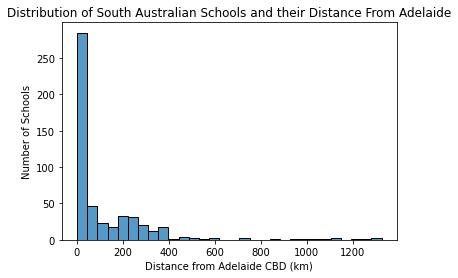

In [67]:
ax1 = sns.histplot(data=df20, x='CBD_dist')
plt.title("Distribution of South Australian Schools and their Distance From Adelaide")
plt.xlabel('Distance from Adelaide CBD (km)')
plt.ylabel("Number of Schools")

Text(0, 0.5, 'Number of Schools')

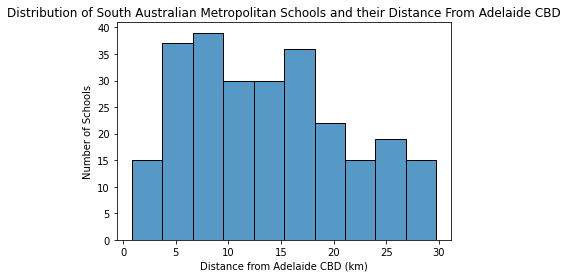

In [69]:
sns.histplot(data=metro, x='CBD_dist')
plt.title("Distribution of South Australian Metropolitan Schools and their Distance From Adelaide CBD")
plt.xlabel('Distance from Adelaide CBD (km)')
plt.ylabel("Number of Schools")

Text(0, 0.5, 'Number of Schools')

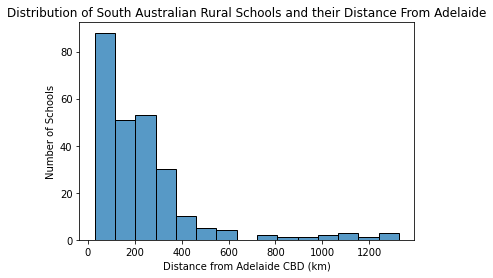

In [71]:
sns.histplot(data=rural, x='CBD_dist', bins=15)
plt.title("Distribution of South Australian Rural Schools and their Distance From Adelaide")
plt.xlabel('Distance from Adelaide CBD (km)')
plt.ylabel("Number of Schools")

<AxesSubplot:xlabel='CBD_dist', ylabel='index_of_educational_disadvantage'>

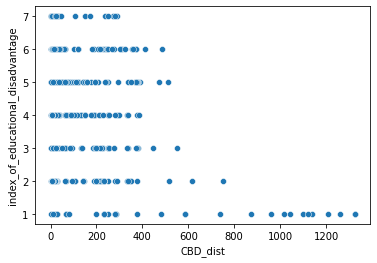

In [72]:
sns.scatterplot(x = 'CBD_dist', y = 'index_of_educational_disadvantage', data=df20)

<AxesSubplot:xlabel='CBD_dist', ylabel='index_of_educational_disadvantage'>

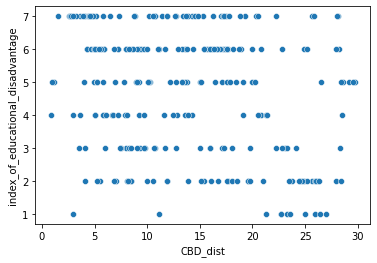

In [73]:
sns.scatterplot(x = 'CBD_dist', y = 'index_of_educational_disadvantage', data=metro)

<AxesSubplot:xlabel='CBD_dist', ylabel='index_of_educational_disadvantage'>

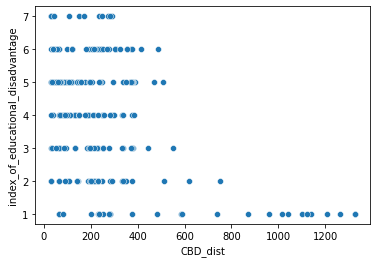

In [74]:
sns.scatterplot(x = 'CBD_dist', y = 'index_of_educational_disadvantage', data=rural)

Text(16.299999999999997, 0.5, 'Number of Schools')

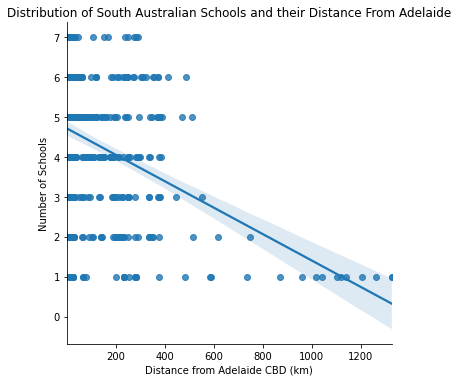

In [75]:
sns.lmplot(x='CBD_dist', y='index_of_educational_disadvantage', data=df20)
plt.title("Distribution of South Australian Schools and their Distance From Adelaide")
plt.xlabel('Distance from Adelaide CBD (km)')
plt.ylabel("Number of Schools")

Text(16.299999999999997, 0.5, 'Number of Schools')

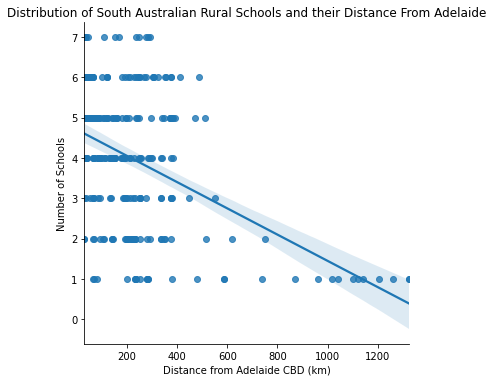

In [77]:
sns.lmplot(x='CBD_dist', y='index_of_educational_disadvantage', data=rural)
plt.title("Distribution of South Australian Rural Schools and their Distance From Adelaide")
plt.xlabel('Distance from Adelaide CBD (km)')
plt.ylabel("Number of Schools")

Text(16.299999999999997, 0.5, 'Number of Schools')

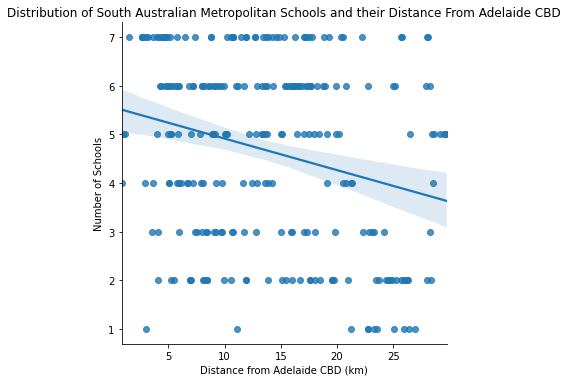

In [78]:
sns.lmplot(x='CBD_dist', y='index_of_educational_disadvantage', data=metro)
plt.title("Distribution of South Australian Metropolitan Schools and their Distance From Adelaide CBD")
plt.xlabel('Distance from Adelaide CBD (km)')
plt.ylabel("Number of Schools")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,10), sharey = True)
sns.lmplot(x='CBD_dist', y='index_of_educational_disadvantage', data=metro)
sns.lmplot(x='CBD_dist', y='index_of_educational_disadvantage', data=rural)
plt.show()

In [79]:
df20.tail()

,id,school_number,school_name,suburb,post_code,type_of_schooling,index_of_educational_disadvantage,latitude,longitude,lat_long,CBD_dist
507,508,501,Yahl Primary School,Yahl,5291,Primary Education,4,-37.879293,140.832014,"(-37.879293, 140.832014)",383.816550
508,509,999,Yalata Anangu School,Yalata,5690,Aboriginal/Anangu Schools,1,-31.480012,131.843548,"(-31.480012, 131.843548)",736.587565
509,510,766,Yankalilla Area School,Yankalilla,5203,Primary/Secondary Combined,5,-35.453300,138.333092,"(-35.4533, 138.333092)",63.029835
510,511,767,Yorketown Area School,Yorketown,5576,Primary/Secondary Combined,4,-35.015376,137.615442,"(-35.015376, 137.615442)",90.297527
511,512,195,Youth Education Centre,Cavan,5094,Secondary Education,1,-34.828265,138.602530,"(-34.828265, 138.60253)",11.143361


In [83]:
#df20.loc[df20.post_code.isin(['5700'])]

,id,school_number,school_name,suburb,post_code,type_of_schooling,index_of_educational_disadvantage,latitude,longitude,lat_long,CBD_dist
23,24,990,Augusta Park Primary School,Port Augusta,5700,Primary Education,1,-32.495595,137.784949,"(-32.495595, 137.784949)",280.207132
64,65,981,Carlton School,Port Augusta,5700,Aboriginal/Anangu Schools,1,-32.487975,137.776238,"(-32.487975, 137.77623799999998)",281.239677
126,127,1396,Flinders View Primary School,Port Augusta West,5700,Primary Education,1,-32.472843,137.753921,"(-32.472843, 137.753921)",283.421528
361,362,790,Port Augusta Secondary School,Port Augusta,5700,Secondary Education,2,-32.493756,137.768758,"(-32.493756, 137.76875800000002)",280.811043
362,363,1399,Port Augusta Special School,Port Augusta West,5700,Special Education,1,-32.472750,137.752157,"(-32.47275, 137.752157)",283.476662
363,364,355,Port Augusta West Primary School,Port Augusta West,5700,Primary Education,4,-32.483205,137.754202,"(-32.483205, 137.754202)",282.308835
493,494,679,Willsden Primary School,Port Augusta,5700,Primary Education,1,-32.506303,137.780351,"(-32.506303, 137.780351)",279.177864


In [84]:
#df20.loc[df20.post_code.isin(['5606'])]

,id,school_number,school_name,suburb,post_code,type_of_schooling,index_of_educational_disadvantage,latitude,longitude,lat_long,CBD_dist
212,213,899,Kirton Point Primary School,Port Lincoln,5606,Primary Education,2,-34.731891,135.868237,"(-34.731891, 135.86823700000002)",250.710264
227,228,1158,Lincoln Gardens Primary School,Port Lincoln,5606,Primary Education,1,-34.741991,135.847525,"(-34.741991, 135.847525)",252.487956
366,367,791,Port Lincoln High School,Port Lincoln,5606,Secondary Education,3,-34.723847,135.853942,"(-34.723847, 135.853942)",252.103851
367,368,1277,Port Lincoln Junior Primary School,Port Lincoln,5606,Primary Education,3,-34.724303,135.857806,"(-34.724303000000006, 135.857806)",251.746596
368,369,359,Port Lincoln Primary School,Port Lincoln,5606,Primary Education,3,-34.723909,135.857158,"(-34.723909, 135.857158)",251.810162
369,370,1801,Port Lincoln Special School,Port Lincoln,5606,Special Education,3,-34.741941,135.846117,"(-34.741941, 135.846117)",252.616831


# Running hypothesis testing on the results

In [80]:
df20.corr()

,id,school_number,post_code,index_of_educational_disadvantage,latitude,longitude,CBD_dist
id,1.000000,-0.020095,0.050344,-0.037091,0.000072,-0.042778,0.024503
school_number,-0.020095,1.000000,-0.233104,-0.229183,0.121867,-0.194497,0.070940
post_code,0.050344,-0.233104,1.000000,0.145098,-0.507158,0.490177,-0.498877
index_of_educational_disadvantage,-0.037091,-0.229183,0.145098,1.000000,-0.336972,0.246766,-0.351973
latitude,0.000072,0.121867,-0.507158,-0.336972,1.000000,-0.800852,0.607761
longitude,-0.042778,-0.194497,0.490177,0.246766,-0.800852,1.000000,-0.579761
CBD_dist,0.024503,0.070940,-0.498877,-0.351973,0.607761,-0.579761,1.000000


In [90]:
N = 100
metro_s = df20[df20['CBD_dist'] <= 30]['index_of_educational_disadvantage'].sample(N)
rural_s = df20[df20['CBD_dist'] > 30]['index_of_educational_disadvantage'].sample(N)

(array([ 1., 12., 11., 11., 21., 23., 21.]),
 array([1.        , 1.85714286, 2.71428571, 3.57142857, 4.42857143,
        5.28571429, 6.14285714, 7.        ]),
 <BarContainer object of 7 artists>)

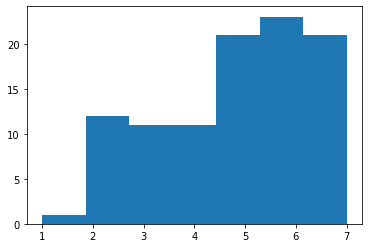

In [147]:
plt.hist(metro_s, bins=7)

(array([14., 13., 14., 18., 20., 18.,  3.]),
 array([1.        , 1.85714286, 2.71428571, 3.57142857, 4.42857143,
        5.28571429, 6.14285714, 7.        ]),
 <BarContainer object of 7 artists>)

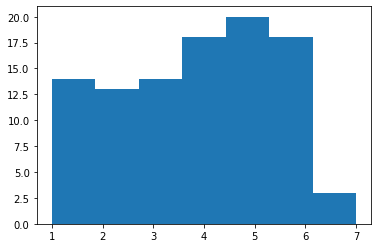

In [107]:
plt.hist(rural_s, bins=7)

C:\Users\matt\.conda\envs\Python 38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Index of Educational Disadvantage - Metro vs Rural Schools')

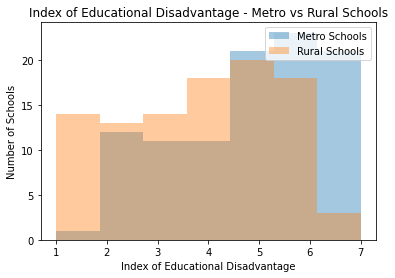

In [133]:
ax = sns.distplot(metro_s, label='Metro Schools', kde=False)
sns.distplot(rural_s, label='Rural Schools', bins=7, kde=False)
plt.legend(loc = 'upper right')
plt.xlabel("Index of Educational Disadvantage")
plt.ylabel("Number of Schools")
plt.title("Index of Educational Disadvantage - Metro vs Rural Schools")

In [112]:
metro_s

418    4
487    3
252    7
431    6
463    7
      ..
174    6
344    7
9      3
1      6
421    5
Name: index_of_educational_disadvantage, Length: 100, dtype: int64

In [92]:
alpha = 0.05

In [104]:
a = metro_s
b = rural_s

print(np.mean(a))
print(np.mean(b))

4.92
3.83


In [94]:
var_a = a.var()
var_b = b.var()

sd = np.sqrt((var_a + var_b)/2)

print("var_a: ", var_a)
print("var_b: ", var_b)
print("sd: ", sd)

var_a:  2.882424242424242
var_b:  3.1122222222222224
sd:  1.7312779188574063


In [96]:
t = (a.mean() - b.mean())/(sd*np.sqrt(2/N))
print('t:', t)

t: 4.4518929231304885


In [100]:
df = 2*N - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)
print('p: ', p)

p:  7.101216399685306e-06


In [101]:
print("t = " + str(t))
print("p = " + str(2*p))

t = 4.4518929231304885
p = 1.4202432799370612e-05


In [102]:
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
    else:
        print("Our test is inconclusive.")

In [103]:
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

print_sig(p2, alpha)

t = 4.451892923130488
p = 1.4202432799365998e-05
We reject our null hypothesis.
